### SQL for SDSS and GalaxyZoo Data from https://skyserver.sdss.org/dr18/SearchTools/sql

In [ ]:
''' 
SELECT TOP 5000
    g.objid, z.objid,
    g.g, g.r, g.i, g.z, g.u_g,
    g.mCr4_u, g.mCr4_g, g.mCr4_r, g.mCr4_i, g.mCr4_z,
    g.petroR50_u, g.petroR50_r, g.petroR50_z,
    g.petroR90_u, g.petroR90_r, g.petroR90_z,
    z.p_el as elliptical, z.p_cw as spiralclock, z.p_acw as spiralanticlock
FROM 
    PhotoObjAll as g, ZooNoSpec AS z
WHERE 
    g.objid = z.objid and g.clean=1
    and z.p_el > 0.7
    
    
SELECT TOP 5000
    g.objid, z.objid,
    g.g, g.r, g.i, g.z, g.u_g,
    g.mCr4_u, g.mCr4_g, g.mCr4_r, g.mCr4_i, g.mCr4_z,
    g.petroR50_u, g.petroR50_r, g.petroR50_z,
    g.petroR90_u, g.petroR90_r, g.petroR90_z, 
    z.p_el as elliptical, z.p_cw as spiralclock, z.p_acw as spiralanticlock,
FROM 
    PhotoObjAll as g, ZooNoSpec AS z
WHERE 
    g.objid = z.objid and g.clean=1
    and (z.p_cw > 0.7 or z.p_acw > 0.7) 
'''

In [1]:
import numpy as np
from numpy.lib.histograms import histogram

import math as m

from astropy.io import fits
import astropy.units as u

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure,show
from matplotlib.figure import Figure

import statsmodels as sm

from IPython.display import Markdown

import pylab as py

from sklearn.mixture import GaussianMixture

from scipy.stats import kstest,norm
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from support_func import plot_confusion_matrix, generate_features_targets

In [2]:
data = fits.open('galaxies.fits')

In [3]:
cls = data[1].data['class']
u_g = data[1].data['u_g'] 
g_r = data[1].data['g_r'] 
r_i = data[1].data['r_i'] 
i_z = data[1].data['i_z'] 
mCr4_u = data[1].data['mCr4_u'] 
mCr4_g = data[1].data['mCr4_g']
mCr4_r = data[1].data['mCr4_r']
mCr4_i = data[1].data['mCr4_i']
mCr4_z = data[1].data['mCr4_z']

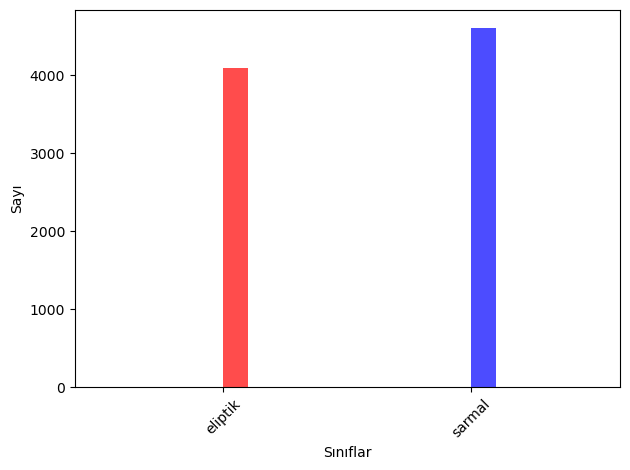

In [4]:
bin1 = cls[cls == 'eliptik']
bin2 = cls[cls == 'sarmal']

plt.hist(bin1, color='red', alpha=0.7)
plt.hist(bin2, color='blue', alpha=0.7)

plt.xlabel('Sınıflar')
plt.ylabel('Sayı')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

## Galaksi Türüne Göre Tüm Renk Ölçekler

/var/folders/b8/2zq_rcc91gg89926l_9vk_xh0000gn/T/ipykernel_1891/1653321421.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axs[0, 0].plot(u_g, cls, 'ro', alpha=0.1, color='c')
/var/folders/b8/2zq_rcc91gg89926l_9vk_xh0000gn/T/ipykernel_1891/1653321421.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axs[0, 1].plot(g_r, cls, 'ro', alpha=0.1, color='c')
/var/folders/b8/2zq_rcc91gg89926l_9vk_xh0000gn/T/ipykernel_1891/1653321421.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axs[1, 0].plot(r_i, cls, 'ro', alpha=0.1, color='c')
/var/folders/b8/2zq_rcc91gg89926l_9vk_xh0000gn/T/ipykernel_1891/1653321421.py:25: UserWarning: color is redundantly de

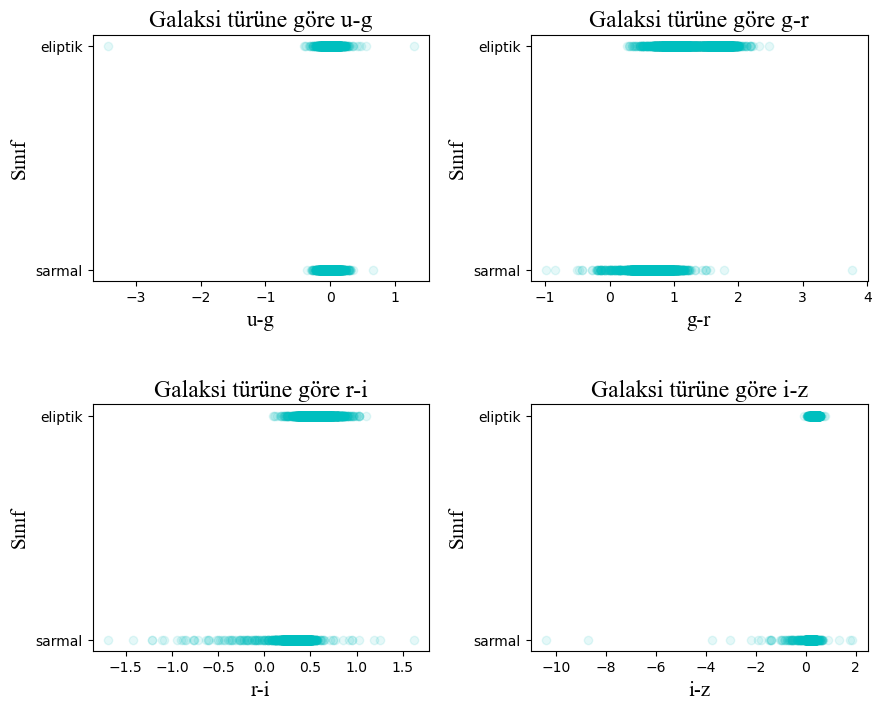

In [5]:
data = fits.open('galaxies.fits')
cls = data[1].data['class']
u_g = data[1].data['u_g']
g_r = data[1].data['g_r']
r_i = data[1].data['r_i']
i_z = data[1].data['i_z']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(u_g, cls, 'ro', alpha=0.1, color='c')
axs[0, 0].set_title('Galaksi türüne göre u-g', fontfamily='Times New Roman', fontsize=17)
axs[0, 0].set_xlabel('u-g', fontfamily='Times New Roman', fontsize=15)
axs[0, 0].set_ylabel('Sınıf', fontfamily='Times New Roman', fontsize=15)

axs[0, 1].plot(g_r, cls, 'ro', alpha=0.1, color='c')
axs[0, 1].set_title('Galaksi türüne göre g-r', fontfamily='Times New Roman', fontsize=17)
axs[0, 1].set_xlabel('g-r', fontfamily='Times New Roman', fontsize=15)
axs[0, 1].set_ylabel('Sınıf', fontfamily='Times New Roman', fontsize=15)

axs[1, 0].plot(r_i, cls, 'ro', alpha=0.1, color='c')
axs[1, 0].set_title('Galaksi türüne göre r-i', fontfamily='Times New Roman', fontsize=17)
axs[1, 0].set_xlabel('r-i', fontfamily='Times New Roman', fontsize=15)
axs[1, 0].set_ylabel('Sınıf', fontfamily='Times New Roman', fontsize=15)

axs[1, 1].plot(i_z, cls, 'ro', alpha=0.1, color='c')
axs[1, 1].set_title('Galaksi türüne göre i-z', fontfamily='Times New Roman', fontsize=17)
axs[1, 1].set_xlabel('i-z', fontfamily='Times New Roman', fontsize=15)
axs[1, 1].set_ylabel('Sınıf', fontfamily='Times New Roman', fontsize=15)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

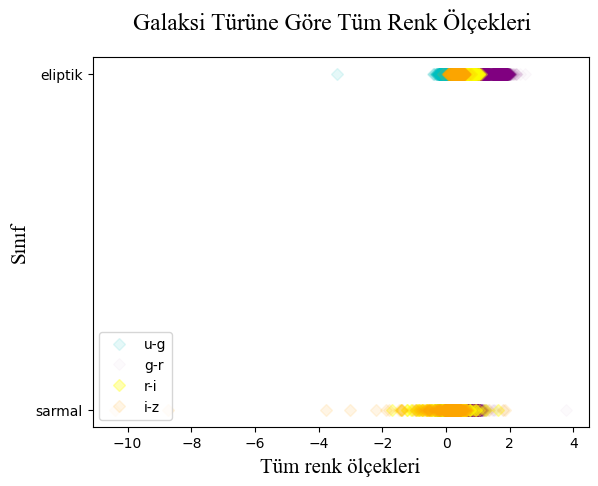

In [6]:
figure = plt.figure()
plt.plot(u_g,cls,'D',color='c', alpha=0.1, label=('u-g'))
plt.plot(g_r,cls,'D',color='purple', alpha=0.02, label=('g-r'))
plt.plot(r_i,cls,'D',color='yellow', alpha=0.3, label=('r-i'))
plt.plot(i_z,cls,'D',color='orange', alpha=0.1, label=('i-z'))
figure.suptitle('Galaksi Türüne Göre Tüm Renk Ölçekleri', fontfamily='Times New Roman', fontsize=17)

plt.xlabel('Tüm renk ölçekleri', fontfamily='Times New Roman', fontsize=15)
plt.ylabel('Sınıf', fontfamily='Times New Roman', fontsize=15)
plt.legend( loc="lower left")

## Decision Tree Classifier

Our accuracy score: 0.8981023576768258
Confusion matrix, without normalization
[[4157  447]
 [ 439 3652]]


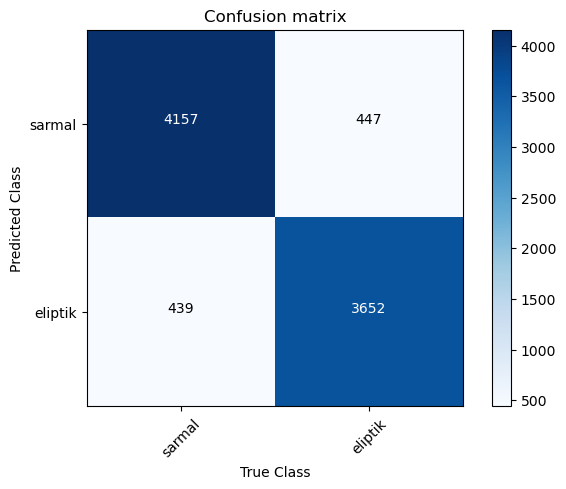

In [7]:
def calculate_accuracy(predicted, actual):
  return sum(predicted==actual)/len(actual)

if __name__ == "__main__":
  data = fits.open('galaxies.fits')
  features, targets = generate_features_targets(data)
  dtc = DecisionTreeClassifier()
  predicted = cross_val_predict(dtc, features, targets, cv=10)
  model_score = calculate_accuracy(predicted, targets)
  print("Our accuracy score:", model_score)
  class_labels = list(set(targets))
  model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)
  plt.figure()
  plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
  plt.show()

### F1 Score for the Decision Tree Classifier

In [8]:
if __name__ == "__main__":
    data = fits.open('galaxies.fits')
    features, targets = generate_features_targets(data)
    features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size=0.2)
    dtc = DecisionTreeClassifier()
    dtc.fit(features_train, targets_train)
    predicted = dtc.predict(features_test)
    f1 = f1_score(targets_test, predicted, average='macro')
    print("F1 score:", f1)

F1 score: 0.8976094126569899


## Random Forest Classifier

In [9]:
def rf_predict_actual(data, n_estimators):
  features, targets = generate_features_targets(data)
  rfc = RandomForestClassifier(n_estimators=n_estimators)
  predicted = cross_val_predict(rfc, features, targets, cv=10)
  return predicted, targets

Accuracy score for 25 is  0.930879815986199
Confusion matrix, without normalization
[[4362  242]
 [ 359 3732]]


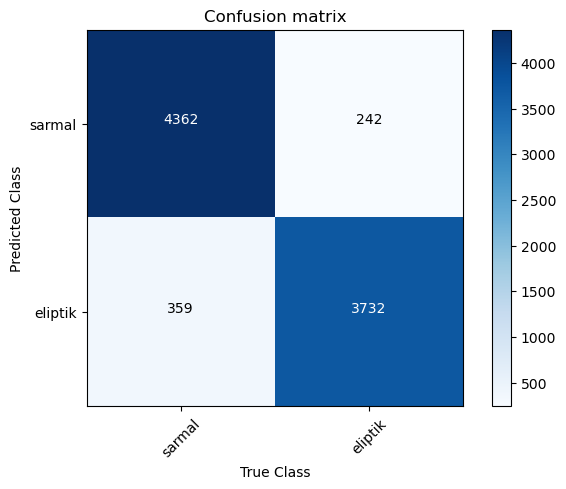

Accuracy score for 50 is  0.9319148936170213
Confusion matrix, without normalization
[[4347  257]
 [ 335 3756]]


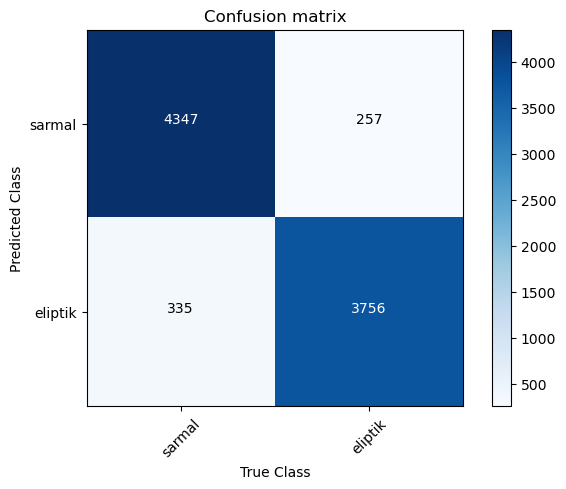

Accuracy score for 75 is  0.9301897642323175
Confusion matrix, without normalization
[[4360  244]
 [ 363 3728]]


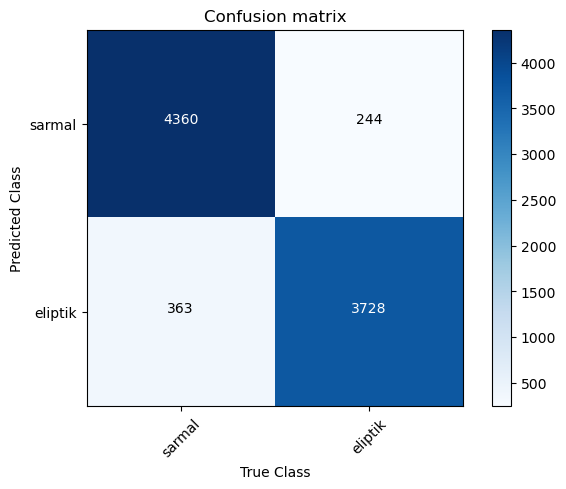

Accuracy score for 100 is  0.9316848763657274
Confusion matrix, without normalization
[[4359  245]
 [ 349 3742]]


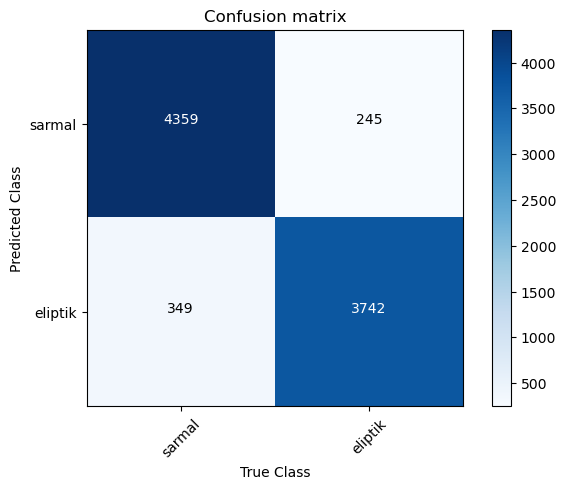

'\nFor 25 - 92.97%\nFor 50 - 93.01%\nFor 75 - 93.06%\nFor 100 - 93.07%\n\n'

In [10]:
if __name__ == "__main__":
    data = fits.open('galaxies.fits')

    number_estimators = [25,50,75,100]            
    for num in number_estimators:
        predicted, actual = rf_predict_actual(data, num)

        accuracy = calculate_accuracy(predicted, actual)
        print("Accuracy score for "+ str(num)+' is ' , accuracy)

        class_labels = list(set(actual))
        model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

        plt.figure()
        plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
        plt.show()
"""
For 25 - 92.97%
For 50 - 93.01%
For 75 - 93.06%
For 100 - 93.07%

"""

### F1 Score for the Random Forest Classifier

In [11]:
def rf_predict_actual(data, n_estimators):
    features, targets = generate_features_targets(data)
    rfc = RandomForestClassifier(n_estimators=n_estimators)
    predicted = cross_val_predict(rfc, features, targets, cv=10)
    return predicted, targets


if __name__ == "__main__":
    data = fits.open('galaxies.fits')

    number_estimators = [25, 50, 75, 100]
    for num in number_estimators:
        predicted, actual = rf_predict_actual(data, num)

        f1 = f1_score(actual, predicted, average='macro')
        print("F1 score for", num, "is", f1)

F1 score for 25 is 0.9307554877084162
F1 score for 50 is 0.9310135430035005
F1 score for 75 is 0.9316780256200574
F1 score for 100 is 0.9309980085866681


## Neural Network Classifier

In [12]:
def dtc_predict_actual(data):
  # split the data into training and testing sets using a training fraction of 0.2
  training_set,testing_set=splitdata_train_test(data,0.2)
  train_features,train_targets=generate_features_targets(training_set)
  test_features,test_targets=generate_features_targets(testing_set)
  scaler = StandardScaler()
  scaler.fit(train_features)
  train_features = scaler.transform(train_features)
  test_features = scaler.transform(test_features)
  mlp = MLPClassifier()
  mlp.fit(train_features,train_targets)
  predictions = mlp.predict(test_features)
  return predictions,test_targets

In [13]:
def splitdata_train_test(data, fraction_training):
  np.random.shuffle(data)
  split_index = int(fraction_training*len(data))
  return data[:split_index],data[split_index:]

[[3865  183]
 [ 226 4421]]
Some initial results...
   predicted,  actual
0. sarmal, sarmal
1. sarmal, sarmal
2. eliptik, sarmal
3. sarmal, sarmal
4. sarmal, sarmal
5. sarmal, sarmal
6. sarmal, sarmal
7. sarmal, sarmal
8. sarmal, sarmal
9. sarmal, sarmal
8695
8695
accuracy =  0.9529614721104083
Confusion matrix, without normalization
[[4421  183]
 [ 226 3865]]


/Users/merve/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


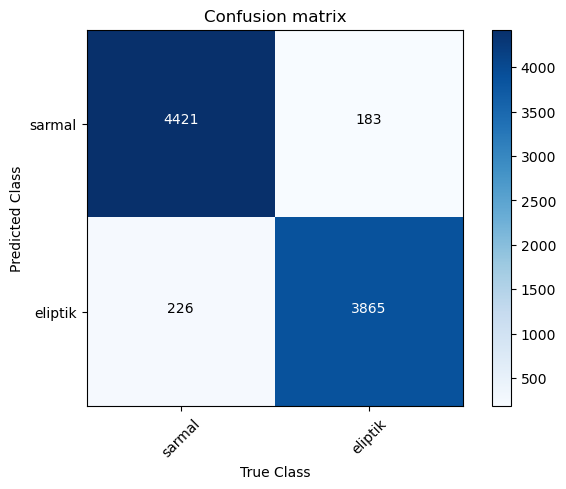

In [14]:
if __name__ == '__main__':
  data = fits.open('galaxies.fits')
    
  predicted_class, actual_class = dtc_predict_actual(data)
  print(confusion_matrix(predicted_class,actual_class))
  print("Some initial results...\n   predicted,  actual")
  for i in range(10):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))
  print(len(predicted_class))
  print(len(actual_class))
  accuracy= sum(predicted_class==actual_class)/len(actual_class)
  print("accuracy = ",accuracy)
    

  class_labels = list(set(actual_class))
  model_cm = confusion_matrix(y_true=actual_class, y_pred=predicted_class, labels=class_labels)    
  plt.figure()
  plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
  plt.show()

### F1 Score for the Neural Network Classifier

In [15]:
predictions, actual_classes = dtc_predict_actual(data)
report = classification_report(actual_classes, predictions, output_dict=True)
f1_score = report['weighted avg']['f1-score']

print("F1 score:", f1_score)

F1 score: 0.9528538064417363


/Users/merve/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
